# TensorFlow

## Hello World

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import tensorflow as tf
import numpy as np

In [39]:
# for making an array with one dimension with a special name we use tf.constannt
a = tf.constant([2], name = 'constant_a')
b = tf.constant([3], name = 'constant_b')

In [40]:
a,b

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([2], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([3], dtype=int32)>)

In [41]:
# for evaluating the value for the function we use this formation
a.numpy()[0]

2

In [13]:
# def add is used for adding two array
def add(a,b):
    c = tf.add(a,b)
    return c

In [12]:
result = add(a,b)
tf.print(result[0])

5


Define multidimensional arrays using tensorflow

In [14]:
scalar = tf.constant(2)
vector = tf.constant([1,2,3])
matrix = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
tensor = tf.constant([[[1,2,3],[1,4,7],[2,5,8]],[[3,6,9],[2,5,8],[0,1,4]],[[2,5,8],[3,6,9],[2,5,4]]])

scalar, vector, matrix, tensor

(<tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>,
 <tf.Tensor: shape=(3, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], dtype=int32)>,
 <tf.Tensor: shape=(3, 3, 3), dtype=int32, numpy=
 array([[[1, 2, 3],
         [1, 4, 7],
         [2, 5, 8]],
 
        [[3, 6, 9],
         [2, 5, 8],
         [0, 1, 4]],
 
        [[2, 5, 8],
         [3, 6, 9],
         [2, 5, 4]]], dtype=int32)>)

In [15]:
scalar.shape, vector.shape, matrix.shape, tensor.shape

(TensorShape([]),
 TensorShape([3]),
 TensorShape([3, 3]),
 TensorShape([3, 3, 3]))

In [16]:
matrix_a = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
matrix_b = tf.constant([[2,2,2],[3,3,3],[7,7,7]])

In [17]:
matrix_a + matrix_b

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 3,  4,  5],
       [ 7,  8,  9],
       [14, 15, 16]], dtype=int32)>

In [18]:
add(matrix_a, matrix_b)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 3,  4,  5],
       [ 7,  8,  9],
       [14, 15, 16]], dtype=int32)>

In [20]:
# multiplication fo two matrix is like this form
def multiplication(a,b):
    return tf.matmul(a,b)

In [21]:
multiplication(matrix_a, matrix_b)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 29,  29,  29],
       [ 65,  65,  65],
       [101, 101, 101]], dtype=int32)>

In [25]:
# and here we have subtract 

a = tf.constant([5])
b = tf.constant([2])
c = tf.add(a,b)
d = tf.subtract(a,b)

c, d

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([7], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([3], dtype=int32)>)

In [28]:
# variables in tensorflow are really important and we can use them in the calculation in this way

v = tf.Variable(0)

def increase_by_two(v):
    return tf.add(v,1)

for i in range(3):
    v = increase_by_two(v)
    print(v)


tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


## Eager Execution
`Eager execution` in TensorFlow refers to an imperative programming environment that evaluates operations immediately as they are called. In contrast to the traditional TensorFlow workflow, where you first define a computational graph and then run it within a session, eager execution allows you to execute TensorFlow operations eagerly, much like you would in standard Python code.



Basicly eager execution enables in Tensorflow 2.x and we can evaluate it by the below code

In [37]:
from tensorflow.python.framework.ops import enable_eager_execution
enable_eager_execution()

In [3]:
tf.executing_eagerly()

True

In [16]:
x = [[4]]
m = tf.matmul(x,x)
print(f'The result is {m.numpy()}')

The result is [[16]]


In [26]:
a = tf.constant(np.array([1., 2., 3.]))
b = tf.constant(np.array([4., 5., 6.]))
c = tf.tensordot(a, b, 1) # (`1`) specifies the axes along which the contraction will happen.
print(f'The type of the `a` is {type(c)}, and its value is {c.numpy()}')

The type of the `a` is <class 'tensorflow.python.framework.ops.EagerTensor'>, and its value is 32.0


Here it is clear that why the eager execution is beneficial and we now that all the functionality of the host language is available and we can use in different functions so easily. Lets look at this fizzbuzz example:

In [35]:
def fizzbuzz(max_num):
    counter = tf.constant(0)
    max_num = tf.convert_to_tensor(max_num)
    for num in range(1, max_num.numpy()+1):
        num = tf.constant(num)
        if int(num%2)==0 and int(num%5)==0:
            print('FizzBuzz')
        elif int(num%5)==0:
            print('Buzz')
        elif int(num%2)==0:
            print('Fizz')
        else:
            print(num.numpy())  
    counter+= 1

In [36]:
fizzbuzz(10)

1
Fizz
3
Fizz
Buzz
Fizz
7
Fizz
9
FizzBuzz


Whereas we can disable eager execution by the below code and here we can see that we are not allow to use the functiones that we have in the host library and we have to make them by ourselves

In [42]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [43]:
tf.executing_eagerly()

False

In [54]:
a = tf.constant(np.array([1., 2., 3.]))
b = tf.constant(np.array([4.,5.,6.]))
c = tf.tensordot(a, b, 1)
print(f'the value of this operation is {c.value_index} and the type of the result is {type(c)}')

the value of this operation is 0 and the type of the result is <class 'tensorflow.python.framework.ops.Tensor'>


So now here is easy to understand that the what s the benefits of the eager execution.

## Linear Regression with TensorFlow

Linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states". 

When more than one independent variable is present the process is called multiple linear regression. <br>
When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is

$$Y = a X + b $$

Where Y is the dependent variable and X is the independent variable, and <b>a</b> and <b>b</b> being the parameters we adjust. <b>a</b> is known as "slope" or "gradient" and <b>b</b> is the "intercept". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import random
%matplotlib inline
random.seed(42)

In [43]:
random.random()

0.5573676134975178

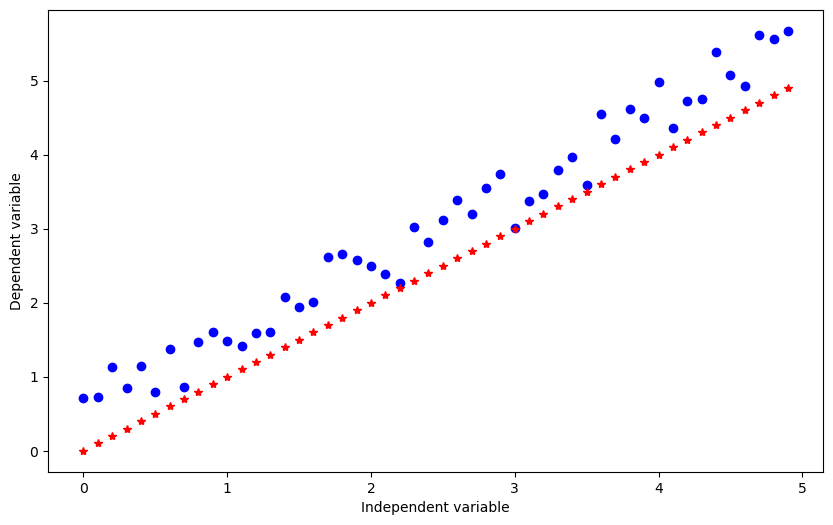

In [58]:
# Defining the independent variable
X = np.arange(0.0, 5.0, 0.1)
# Adjusting the slop
a = 1
# Adjusting the intercept
b = 0
# Defining thr dependent variable
Y = a*X + b
lst_rand = []
for i in range(len(X)):
    lst_rand.append(random.random())
Y_N = Y + np.array(lst_rand)

plt.plot(X,Y_N,'o',c = 'blue')
plt.plot(X,Y, '*',c = 'red')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()